In [1]:
from __future__ import print_function, division
import torch
import torch
import torch.nn as nn
import torch.optim as optim
import data as dt
import model as md
from torch.utils.data import DataLoader

In [2]:
device = "cuda"

In [3]:
# generate csv file, run only for the first time
# dt.generate_csv()

In [4]:
csvFilePath = dt.get_csv_path()
transformed_dataset = dt.HE_SHG_Dataset(csv_file=csvFilePath,
                                               transform=dt.Compose([
                                               dt.ToTensor(),
                                               dt.Rescale(96),
                                               dt.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])                                               
                                           ]))
# TODO: change the normalization parameters

In [5]:
dataloader = DataLoader(transformed_dataset, batch_size=32,
                        shuffle=True, num_workers=0)

0 torch.Size([32, 3, 96, 96]) torch.Size([32, 96, 96])
1 torch.Size([32, 3, 96, 96]) torch.Size([32, 96, 96])
2 torch.Size([32, 3, 96, 96]) torch.Size([32, 96, 96])
3 torch.Size([32, 3, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


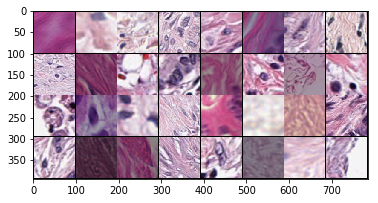

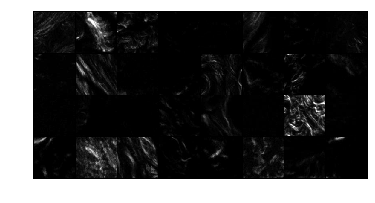

In [6]:
# TODO: insert back mean and variance to plot the image appropriately
dt.show_patch(dataloader) 

In [7]:
print('===> Building model')
model = md.Net().to("cuda")
criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.0001)








===> Building model


In [8]:
def train(epoch):
    epoch_loss = 0
    for iteration, batch in enumerate(dataloader):
        input, target = batch['input'].to(device), batch['output'].to(device)

        optimizer.zero_grad()
        
        loss = criterion(model(input), target.float())
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
    
        if iteration%50 == 0:
            print("===> Epoch[{}]({}/{}): Loss: {:.4f}".format(epoch, iteration, len(dataloader), loss.item()))

    print("===> Epoch {} Complete: Avg. Loss: {:.4f}".format(epoch, epoch_loss / len(dataloader)))


In [9]:
def checkpoint(epoch):
    model_out_path = "model_epoch_{}.pth".format(epoch)
    torch.save(model, model_out_path)
    print("Checkpoint saved to {}".format(model_out_path))

In [12]:
for epoch in range(1, 5 + 1):
    train(epoch)

===> Epoch[1](0/25343): Loss: 1.3403
===> Epoch[1](50/25343): Loss: 1.3588
===> Epoch[1](100/25343): Loss: 1.3558
===> Epoch[1](150/25343): Loss: 1.3399
===> Epoch[1](200/25343): Loss: 1.3449
===> Epoch[1](250/25343): Loss: 1.3101
===> Epoch[1](300/25343): Loss: 1.3095
===> Epoch[1](350/25343): Loss: 1.2973
===> Epoch[1](400/25343): Loss: 1.3310
===> Epoch[1](450/25343): Loss: 1.3474
===> Epoch[1](500/25343): Loss: 1.3627
===> Epoch[1](550/25343): Loss: 1.3116
===> Epoch[1](600/25343): Loss: 1.2881
===> Epoch[1](650/25343): Loss: 1.3598
===> Epoch[1](700/25343): Loss: 1.3497
===> Epoch[1](750/25343): Loss: 1.3518
===> Epoch[1](800/25343): Loss: 1.3340
===> Epoch[1](850/25343): Loss: 1.3315
===> Epoch[1](900/25343): Loss: 1.3474
===> Epoch[1](950/25343): Loss: 1.3428
===> Epoch[1](1000/25343): Loss: 1.2871
===> Epoch[1](1050/25343): Loss: 1.3078
===> Epoch[1](1100/25343): Loss: 1.3186
===> Epoch[1](1150/25343): Loss: 1.3449
===> Epoch[1](1200/25343): Loss: 1.3598
===> Epoch[1](1250/2534

===> Epoch[1](10300/25343): Loss: 1.3211
===> Epoch[1](10350/25343): Loss: 1.3269
===> Epoch[1](10400/25343): Loss: 1.3048
===> Epoch[1](10450/25343): Loss: 1.3141
===> Epoch[1](10500/25343): Loss: 1.2807
===> Epoch[1](10550/25343): Loss: 1.3400
===> Epoch[1](10600/25343): Loss: 1.3082
===> Epoch[1](10650/25343): Loss: 1.3344
===> Epoch[1](10700/25343): Loss: 1.3491
===> Epoch[1](10750/25343): Loss: 1.2858
===> Epoch[1](10800/25343): Loss: 1.3109
===> Epoch[1](10850/25343): Loss: 1.2443
===> Epoch[1](10900/25343): Loss: 1.2812
===> Epoch[1](10950/25343): Loss: 1.3305
===> Epoch[1](11000/25343): Loss: 1.3217
===> Epoch[1](11050/25343): Loss: 1.2689
===> Epoch[1](11100/25343): Loss: 1.3376
===> Epoch[1](11150/25343): Loss: 1.2716
===> Epoch[1](11200/25343): Loss: 1.2476
===> Epoch[1](11250/25343): Loss: 1.3230
===> Epoch[1](11300/25343): Loss: 1.2725
===> Epoch[1](11350/25343): Loss: 1.2882
===> Epoch[1](11400/25343): Loss: 1.2695
===> Epoch[1](11450/25343): Loss: 1.2473
===> Epoch[1](11

===> Epoch[1](20300/25343): Loss: 1.3001
===> Epoch[1](20350/25343): Loss: 1.2624
===> Epoch[1](20400/25343): Loss: 1.2339
===> Epoch[1](20450/25343): Loss: 1.2660
===> Epoch[1](20500/25343): Loss: 1.2979
===> Epoch[1](20550/25343): Loss: 1.2250
===> Epoch[1](20600/25343): Loss: 1.2729
===> Epoch[1](20650/25343): Loss: 1.2168
===> Epoch[1](20700/25343): Loss: 1.2636
===> Epoch[1](20750/25343): Loss: 1.2433
===> Epoch[1](20800/25343): Loss: 1.2746
===> Epoch[1](20850/25343): Loss: 1.3149
===> Epoch[1](20900/25343): Loss: 1.2608
===> Epoch[1](20950/25343): Loss: 1.2690
===> Epoch[1](21000/25343): Loss: 1.2958
===> Epoch[1](21050/25343): Loss: 1.3211
===> Epoch[1](21100/25343): Loss: 1.1810
===> Epoch[1](21150/25343): Loss: 1.2805
===> Epoch[1](21200/25343): Loss: 1.2894
===> Epoch[1](21250/25343): Loss: 1.2687
===> Epoch[1](21300/25343): Loss: 1.2636
===> Epoch[1](21350/25343): Loss: 1.2412
===> Epoch[1](21400/25343): Loss: 1.2452
===> Epoch[1](21450/25343): Loss: 1.2897
===> Epoch[1](21

===> Epoch[2](5050/25343): Loss: 1.2891
===> Epoch[2](5100/25343): Loss: 1.2525
===> Epoch[2](5150/25343): Loss: 1.2588
===> Epoch[2](5200/25343): Loss: 1.2143
===> Epoch[2](5250/25343): Loss: 1.2134
===> Epoch[2](5300/25343): Loss: 1.2735
===> Epoch[2](5350/25343): Loss: 1.2325
===> Epoch[2](5400/25343): Loss: 1.2641
===> Epoch[2](5450/25343): Loss: 1.2198
===> Epoch[2](5500/25343): Loss: 1.1723
===> Epoch[2](5550/25343): Loss: 1.2276
===> Epoch[2](5600/25343): Loss: 1.2284
===> Epoch[2](5650/25343): Loss: 1.2563
===> Epoch[2](5700/25343): Loss: 1.2309
===> Epoch[2](5750/25343): Loss: 1.2766
===> Epoch[2](5800/25343): Loss: 1.2211
===> Epoch[2](5850/25343): Loss: 1.2283
===> Epoch[2](5900/25343): Loss: 1.2552
===> Epoch[2](5950/25343): Loss: 1.2137
===> Epoch[2](6000/25343): Loss: 1.2354
===> Epoch[2](6050/25343): Loss: 1.2397
===> Epoch[2](6100/25343): Loss: 1.2234
===> Epoch[2](6150/25343): Loss: 1.2272
===> Epoch[2](6200/25343): Loss: 1.2027
===> Epoch[2](6250/25343): Loss: 1.1479


===> Epoch[2](15200/25343): Loss: 1.1951
===> Epoch[2](15250/25343): Loss: 1.2060
===> Epoch[2](15300/25343): Loss: 1.2182
===> Epoch[2](15350/25343): Loss: 1.2127
===> Epoch[2](15400/25343): Loss: 1.1542
===> Epoch[2](15450/25343): Loss: 1.2220
===> Epoch[2](15500/25343): Loss: 1.1966
===> Epoch[2](15550/25343): Loss: 1.2139
===> Epoch[2](15600/25343): Loss: 1.1890
===> Epoch[2](15650/25343): Loss: 1.2074
===> Epoch[2](15700/25343): Loss: 1.2528
===> Epoch[2](15750/25343): Loss: 1.2360
===> Epoch[2](15800/25343): Loss: 1.2210
===> Epoch[2](15850/25343): Loss: 1.2093
===> Epoch[2](15900/25343): Loss: 1.1868
===> Epoch[2](15950/25343): Loss: 1.1900
===> Epoch[2](16000/25343): Loss: 1.1802
===> Epoch[2](16050/25343): Loss: 1.2271
===> Epoch[2](16100/25343): Loss: 1.2185
===> Epoch[2](16150/25343): Loss: 1.1746
===> Epoch[2](16200/25343): Loss: 1.2220
===> Epoch[2](16250/25343): Loss: 1.2085
===> Epoch[2](16300/25343): Loss: 1.2202
===> Epoch[2](16350/25343): Loss: 1.1737
===> Epoch[2](16

===> Epoch[2](25200/25343): Loss: 1.1470
===> Epoch[2](25250/25343): Loss: 1.2116
===> Epoch[2](25300/25343): Loss: 1.2014
===> Epoch 2 Complete: Avg. Loss: 1.2133
===> Epoch[3](0/25343): Loss: 1.1887
===> Epoch[3](50/25343): Loss: 1.1728
===> Epoch[3](100/25343): Loss: 1.1809
===> Epoch[3](150/25343): Loss: 1.2087
===> Epoch[3](200/25343): Loss: 1.1589
===> Epoch[3](250/25343): Loss: 1.2089
===> Epoch[3](300/25343): Loss: 1.2135
===> Epoch[3](350/25343): Loss: 1.1781
===> Epoch[3](400/25343): Loss: 1.1159
===> Epoch[3](450/25343): Loss: 1.1934
===> Epoch[3](500/25343): Loss: 1.1832
===> Epoch[3](550/25343): Loss: 1.1693
===> Epoch[3](600/25343): Loss: 1.2172
===> Epoch[3](650/25343): Loss: 1.1794
===> Epoch[3](700/25343): Loss: 1.1927
===> Epoch[3](750/25343): Loss: 1.1941
===> Epoch[3](800/25343): Loss: 1.1775
===> Epoch[3](850/25343): Loss: 1.1744
===> Epoch[3](900/25343): Loss: 1.1978
===> Epoch[3](950/25343): Loss: 1.1678
===> Epoch[3](1000/25343): Loss: 1.1753
===> Epoch[3](1050/

===> Epoch[3](10100/25343): Loss: 1.1777
===> Epoch[3](10150/25343): Loss: 1.1410
===> Epoch[3](10200/25343): Loss: 1.1529
===> Epoch[3](10250/25343): Loss: 1.1564
===> Epoch[3](10300/25343): Loss: 1.1339
===> Epoch[3](10350/25343): Loss: 1.1315
===> Epoch[3](10400/25343): Loss: 1.1271
===> Epoch[3](10450/25343): Loss: 1.1812
===> Epoch[3](10500/25343): Loss: 1.1572
===> Epoch[3](10550/25343): Loss: 1.1485
===> Epoch[3](10600/25343): Loss: 1.1643
===> Epoch[3](10650/25343): Loss: 1.1233
===> Epoch[3](10700/25343): Loss: 1.1049
===> Epoch[3](10750/25343): Loss: 1.1599
===> Epoch[3](10800/25343): Loss: 1.1853
===> Epoch[3](10850/25343): Loss: 1.1214
===> Epoch[3](10900/25343): Loss: 1.1642
===> Epoch[3](10950/25343): Loss: 1.1352
===> Epoch[3](11000/25343): Loss: 1.1441
===> Epoch[3](11050/25343): Loss: 1.1348
===> Epoch[3](11100/25343): Loss: 1.1190
===> Epoch[3](11150/25343): Loss: 1.1444
===> Epoch[3](11200/25343): Loss: 1.1395
===> Epoch[3](11250/25343): Loss: 1.1350
===> Epoch[3](11

===> Epoch[3](20100/25343): Loss: 1.1206
===> Epoch[3](20150/25343): Loss: 1.1284
===> Epoch[3](20200/25343): Loss: 1.1470
===> Epoch[3](20250/25343): Loss: 1.1412
===> Epoch[3](20300/25343): Loss: 1.1330
===> Epoch[3](20350/25343): Loss: 1.1388
===> Epoch[3](20400/25343): Loss: 1.1259
===> Epoch[3](20450/25343): Loss: 1.1933
===> Epoch[3](20500/25343): Loss: 1.1075
===> Epoch[3](20550/25343): Loss: 1.1098
===> Epoch[3](20600/25343): Loss: 1.1182
===> Epoch[3](20650/25343): Loss: 1.1523
===> Epoch[3](20700/25343): Loss: 1.1216
===> Epoch[3](20750/25343): Loss: 1.1263
===> Epoch[3](20800/25343): Loss: 1.1528
===> Epoch[3](20850/25343): Loss: 1.1612
===> Epoch[3](20900/25343): Loss: 1.1092
===> Epoch[3](20950/25343): Loss: 1.1250
===> Epoch[3](21000/25343): Loss: 1.1195
===> Epoch[3](21050/25343): Loss: 1.1115
===> Epoch[3](21100/25343): Loss: 1.1226
===> Epoch[3](21150/25343): Loss: 1.1716
===> Epoch[3](21200/25343): Loss: 1.1491
===> Epoch[3](21250/25343): Loss: 1.1074
===> Epoch[3](21

===> Epoch[4](4850/25343): Loss: 1.0878
===> Epoch[4](4900/25343): Loss: 1.0980
===> Epoch[4](4950/25343): Loss: 1.1100
===> Epoch[4](5000/25343): Loss: 1.1007
===> Epoch[4](5050/25343): Loss: 1.1094
===> Epoch[4](5100/25343): Loss: 1.1031
===> Epoch[4](5150/25343): Loss: 1.1267
===> Epoch[4](5200/25343): Loss: 1.1186
===> Epoch[4](5250/25343): Loss: 1.0847
===> Epoch[4](5300/25343): Loss: 1.1234
===> Epoch[4](5350/25343): Loss: 1.1062
===> Epoch[4](5400/25343): Loss: 1.0935
===> Epoch[4](5450/25343): Loss: 1.0969
===> Epoch[4](5500/25343): Loss: 1.0556
===> Epoch[4](5550/25343): Loss: 1.1154
===> Epoch[4](5600/25343): Loss: 1.1394
===> Epoch[4](5650/25343): Loss: 1.1278
===> Epoch[4](5700/25343): Loss: 1.0611
===> Epoch[4](5750/25343): Loss: 1.0717
===> Epoch[4](5800/25343): Loss: 1.0850
===> Epoch[4](5850/25343): Loss: 1.0908
===> Epoch[4](5900/25343): Loss: 1.1090
===> Epoch[4](5950/25343): Loss: 1.1116
===> Epoch[4](6000/25343): Loss: 1.1226
===> Epoch[4](6050/25343): Loss: 1.1023


===> Epoch[4](15000/25343): Loss: 1.1161
===> Epoch[4](15050/25343): Loss: 1.1029
===> Epoch[4](15100/25343): Loss: 1.0821
===> Epoch[4](15150/25343): Loss: 1.0958
===> Epoch[4](15200/25343): Loss: 1.0654
===> Epoch[4](15250/25343): Loss: 1.1190
===> Epoch[4](15300/25343): Loss: 1.0807
===> Epoch[4](15350/25343): Loss: 1.0546
===> Epoch[4](15400/25343): Loss: 1.0690
===> Epoch[4](15450/25343): Loss: 1.0837
===> Epoch[4](15500/25343): Loss: 1.0468
===> Epoch[4](15550/25343): Loss: 1.0693
===> Epoch[4](15600/25343): Loss: 1.0557
===> Epoch[4](15650/25343): Loss: 1.1066
===> Epoch[4](15700/25343): Loss: 1.1062
===> Epoch[4](15750/25343): Loss: 1.0959
===> Epoch[4](15800/25343): Loss: 1.1001
===> Epoch[4](15850/25343): Loss: 1.0938
===> Epoch[4](15900/25343): Loss: 1.1145
===> Epoch[4](15950/25343): Loss: 1.0584
===> Epoch[4](16000/25343): Loss: 1.0618
===> Epoch[4](16050/25343): Loss: 1.0907
===> Epoch[4](16100/25343): Loss: 1.1095
===> Epoch[4](16150/25343): Loss: 1.1153
===> Epoch[4](16

===> Epoch[4](25000/25343): Loss: 1.0841
===> Epoch[4](25050/25343): Loss: 1.0565
===> Epoch[4](25100/25343): Loss: 1.0301
===> Epoch[4](25150/25343): Loss: 1.0619
===> Epoch[4](25200/25343): Loss: 1.0967
===> Epoch[4](25250/25343): Loss: 1.0618
===> Epoch[4](25300/25343): Loss: 1.0527
===> Epoch 4 Complete: Avg. Loss: 1.0954
===> Epoch[5](0/25343): Loss: 1.0761
===> Epoch[5](50/25343): Loss: 1.0640
===> Epoch[5](100/25343): Loss: 1.0753
===> Epoch[5](150/25343): Loss: 1.0490
===> Epoch[5](200/25343): Loss: 1.0982
===> Epoch[5](250/25343): Loss: 1.0862
===> Epoch[5](300/25343): Loss: 1.0505
===> Epoch[5](350/25343): Loss: 1.0656
===> Epoch[5](400/25343): Loss: 1.0370
===> Epoch[5](450/25343): Loss: 1.0785
===> Epoch[5](500/25343): Loss: 1.0819
===> Epoch[5](550/25343): Loss: 1.0875
===> Epoch[5](600/25343): Loss: 1.0415
===> Epoch[5](650/25343): Loss: 1.0812
===> Epoch[5](700/25343): Loss: 1.0896
===> Epoch[5](750/25343): Loss: 1.0527
===> Epoch[5](800/25343): Loss: 1.0743
===> Epoch[5

===> Epoch[5](9900/25343): Loss: 1.0638
===> Epoch[5](9950/25343): Loss: 1.0284
===> Epoch[5](10000/25343): Loss: 1.0906
===> Epoch[5](10050/25343): Loss: 1.0546
===> Epoch[5](10100/25343): Loss: 1.0356
===> Epoch[5](10150/25343): Loss: 1.0285
===> Epoch[5](10200/25343): Loss: 1.0510
===> Epoch[5](10250/25343): Loss: 1.0971
===> Epoch[5](10300/25343): Loss: 1.0086
===> Epoch[5](10350/25343): Loss: 1.0432
===> Epoch[5](10400/25343): Loss: 1.0597
===> Epoch[5](10450/25343): Loss: 1.0667
===> Epoch[5](10500/25343): Loss: 1.0674
===> Epoch[5](10550/25343): Loss: 1.0723
===> Epoch[5](10600/25343): Loss: 1.0110
===> Epoch[5](10650/25343): Loss: 1.0397
===> Epoch[5](10700/25343): Loss: 1.0741
===> Epoch[5](10750/25343): Loss: 1.0705
===> Epoch[5](10800/25343): Loss: 1.0571
===> Epoch[5](10850/25343): Loss: 1.0794
===> Epoch[5](10900/25343): Loss: 1.0529
===> Epoch[5](10950/25343): Loss: 1.0855
===> Epoch[5](11000/25343): Loss: 1.0455
===> Epoch[5](11050/25343): Loss: 1.0776
===> Epoch[5](1110

===> Epoch[5](19900/25343): Loss: 1.0463
===> Epoch[5](19950/25343): Loss: 1.0497
===> Epoch[5](20000/25343): Loss: 1.0388
===> Epoch[5](20050/25343): Loss: 1.0271
===> Epoch[5](20100/25343): Loss: 1.0392
===> Epoch[5](20150/25343): Loss: 0.9993
===> Epoch[5](20200/25343): Loss: 1.0346
===> Epoch[5](20250/25343): Loss: 1.0187
===> Epoch[5](20300/25343): Loss: 1.0320
===> Epoch[5](20350/25343): Loss: 1.0628
===> Epoch[5](20400/25343): Loss: 1.0053
===> Epoch[5](20450/25343): Loss: 1.0573
===> Epoch[5](20500/25343): Loss: 1.0482
===> Epoch[5](20550/25343): Loss: 1.0106
===> Epoch[5](20600/25343): Loss: 1.0705
===> Epoch[5](20650/25343): Loss: 0.9793
===> Epoch[5](20700/25343): Loss: 1.0145
===> Epoch[5](20750/25343): Loss: 1.0344
===> Epoch[5](20800/25343): Loss: 1.0233
===> Epoch[5](20850/25343): Loss: 1.0868
===> Epoch[5](20900/25343): Loss: 1.0479
===> Epoch[5](20950/25343): Loss: 0.9560
===> Epoch[5](21000/25343): Loss: 1.0558
===> Epoch[5](21050/25343): Loss: 1.0729
===> Epoch[5](21

In [10]:
import matplotlib.pyplot as plt
from torchvision import transforms, utils
def test():

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# required by printing data
    name_index = 0
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

    avg_psnr = 0
    with torch.no_grad():
        for iteration, batch in enumerate(dataloader):
            input, target = batch['input'].to(device), batch['output'].to(device)

            prediction = model(input)
#             print(prediction.type())
#             print(prediction.size())
#             print(target.type())
            target = target.float()
#             print(target.type())
#             print(target.size())

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# start print
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#             print(prediction[0][0])
#             print(target[0])
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# end print
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# start plot
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
            outdataloader = {'input':prediction,'output':target}
            
            print(outdataloader['input'].size(), 
                      outdataloader['output'].size())

#                 # observe 4th batch and stop.
#                 if i_batch == 3:
            plt.figure()
            input_batch, label_batch = outdataloader['input'], outdataloader['output']
            batch_size = 32
            im_size = input_batch.size(2)
            label_batch=label_batch.reshape([batch_size,1,im_size,im_size])
            print(label_batch.size())
            for img in input_batch:
                for t, m, s in zip(img, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]):
                    t.mul_(s).add_(m)
                            
            for img in label_batch:
                for t, m, s in zip(img, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]):
                    t.mul_(s).add_(m)
                            
#                     input_batch = unnormalize_img(input_batch, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
#                     label_batch = unnormalize_img(label_batch, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5])

            grid = utils.make_grid(input_batch).cpu()
            plt.imshow(grid.numpy().transpose((1, 2, 0)))
            plt.figure()
            
            
        
            grid = utils.make_grid(label_batch).cpu()
            plt.imshow(grid.numpy().transpose((1, 2, 0)))

            plt.axis('off')
            plt.ioff()
            plt.show()
            
#             break
#             print(outdataloader.type())
#             print(outdataloader.size())
#             dt.show_patch(outdataloader)
#             break
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# end plot
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

            mse = criterion(prediction, target.float())
#             print(mse.type())
#             print(mse.size())
#             psnr = 10 * torch.log10(1 / mse.item())
            psnr = 10 * torch.log10(1 / mse)
            avg_psnr += psnr

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #        
#         save internal images from gan, and their labels.
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
            img_to_print = input_batch
            label_to_print = label_batch
            for i in range(img_to_print.size(0)):
                utils.save_image(img_to_print[i, :, :, :], 'img_new/{}.png'.format(name_index))
                utils.save_image(label_to_print[i, :, :, :], 'img_new_label/{}.png'.format(name_index))
                name_index = name_index + 1
                
    print("===> Avg. PSNR: {:.4f} dB".format(avg_psnr / len(dataloader)))


torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


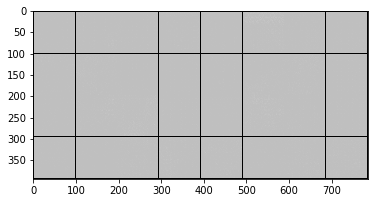

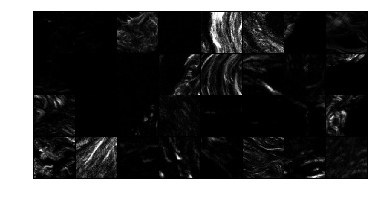

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


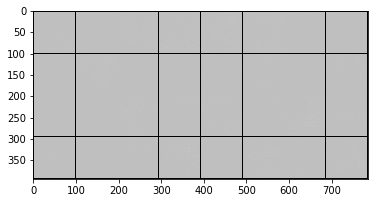

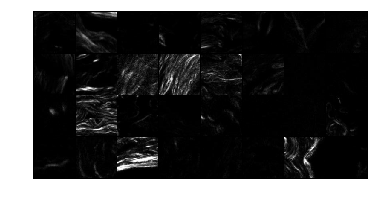

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


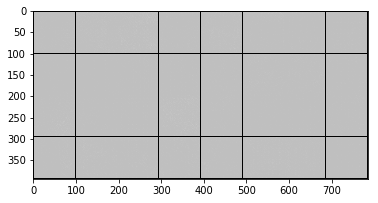

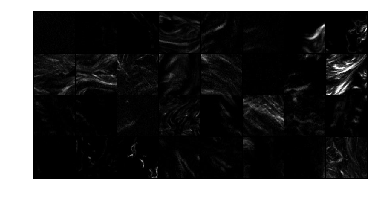

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


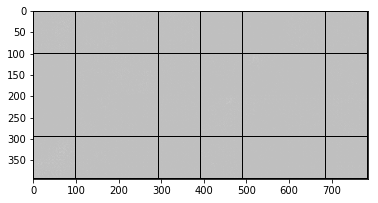

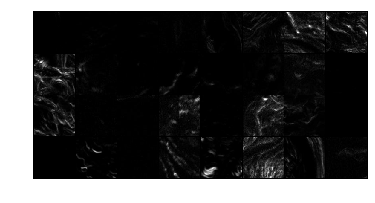

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


KeyboardInterrupt: 

In [11]:
test()

In [116]:
checkpoint(epoch)

Checkpoint saved to model_epoch_1.pth


In [11]:
def load_checkpoint(epoch):
    model_out_path = "model_epoch_{}.pth".format(epoch)
    checkpoint_to_load = torch.load(model_out_path)
    print("Checkpoint {} loaded.".format(model_out_path))


In [12]:
load_checkpoint(1)

Checkpoint model_epoch_1.pth loaded.
